# Tholins aerosols examples

To use this notebook you need to install the [`titan-aerosols`](https://github.com/seignovert/python-titan-aerosols) from pip and `matplotlib`:

```bash
pip install matplotlib titan-aerosols
```

In [1]:
import matplotlib.pyplot as plt

## Tholins mie scattering

In [2]:
from aerosols import mie_tholins

In [3]:
wvln = 338e-9  # Wavelength [m]
rm = 50e-9     # Monomer radius [m]

In [4]:
qsct, qext, qabs, gg, theta, P = mie_tholins(wvln, rm)

qsct, qext, qabs, gg

(2.150748326506086e-15,
 6.519732093912762e-15,
 4.368983767406676e-15,
 0.19301947916187234)

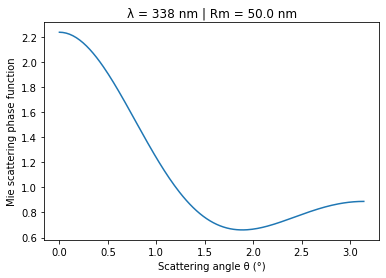

In [5]:
plt.plot(theta, P)

plt.xlabel('Scattering angle θ (°)')
plt.ylabel('Mie scattering phase function')
plt.title(f'λ = {wvln * 1e9:.0f} nm | Rm = {rm * 1e9:.1f} nm');

## Tholins fractals scattering

In [6]:
from aerosols import fractals_tholins

In [7]:
Df = 2.0  # Fractal dimentsion
N = 266   # Number of monomers

In [8]:
qsct, qext, qabs, _, theta_266, P_266 = fractals_tholins(wvln, rm, Df, N)

qsct, qext, qabs

(1.5986535423863113e-12, 2.5652821769307767e-12, 9.666286345444654e-13)

The Tomasko et al. 2008 model is only tested up to 1024 monomers:

In [9]:
N = 3000

try:

    fractals_tholins(wvln, rm, Df, N)

except ValueError as err:
    print(f'ValueError: {err}')

ValueError: Model tested only for N = 2 - 1024 (received N=3000)


But based on the authors comments, it can still be use for a larger number of monomers:

In [10]:
qsct, qext, qabs, _, theta_3000, P_3000 = fractals_tholins(wvln, rm, Df, N, force=True)

qsct, qext, qabs

(1.877008401099561e-11, 2.829777018602765e-11, 9.527686175032043e-12)

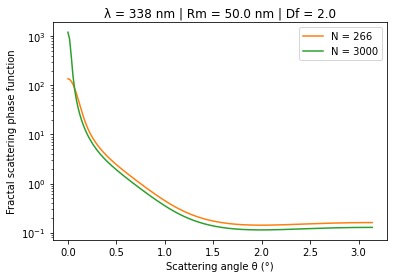

In [11]:
plt.semilogy(theta_266, P_266, color='tab:orange', label='N = 266')
plt.semilogy(theta_3000, P_3000, color='tab:green', label='N = 3000')

plt.legend()
plt.xlabel('Scattering angle θ (°)')
plt.ylabel('Fractal scattering phase function')
plt.title(f'λ = {wvln * 1e9:.0f} nm | Rm = {rm * 1e9:.1f} nm | Df = {Df}');

## Get tholins optical index from the database

In [12]:
from aerosols import index_tholins

nr, ni = index_tholins(338e-9)

nr, ni

(1.6489699384541059, 0.2392676321412895)

## Use the model for a custom set of optical index

In [13]:
from aerosols import mie, fractals

In [14]:
qsct, qext, qabs, gg, theta_mie, P_mie = mie(wvln, nr, ni, rm)

qsct, qext, qabs, gg

(2.150748326506086e-15,
 6.519732093912762e-15,
 4.368983767406676e-15,
 0.19301947916187234)

In [15]:
qsct, qext, qabs, _, theta_fractals, P_fractals = fractals(wvln, nr, ni, rm, Df, N, force=True)

qsct, qext, qabs

(1.877008401099561e-11, 2.829777018602765e-11, 9.527686175032043e-12)

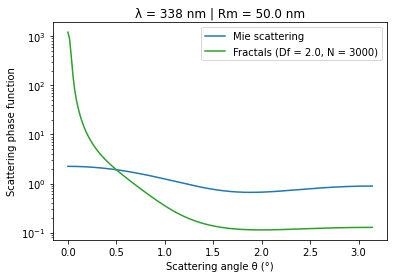

In [16]:
plt.semilogy(theta_mie, P_mie, color='tab:blue', label='Mie scattering')
plt.semilogy(theta_fractals, P_fractals, color='tab:green', label=f'Fractals (Df = {Df}, N = {N})')

plt.legend()
plt.xlabel('Scattering angle θ (°)')
plt.ylabel('Scattering phase function')
plt.title(f'λ = {wvln * 1e9:.0f} nm | Rm = {rm * 1e9:.1f} nm');